# Underfitting vs. Overfitting

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Rozważmy następujący zbiór punktów:

In [15]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

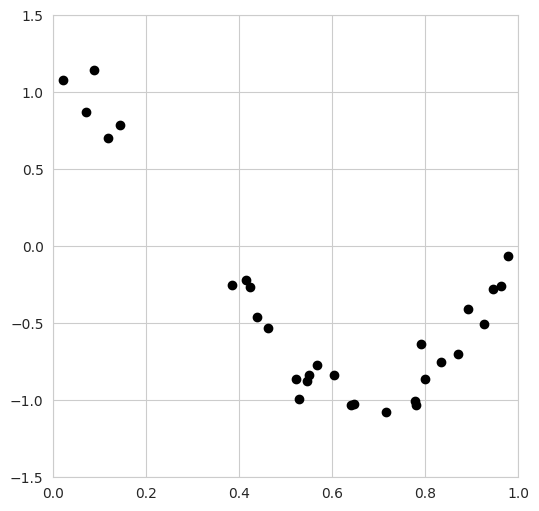

In [16]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

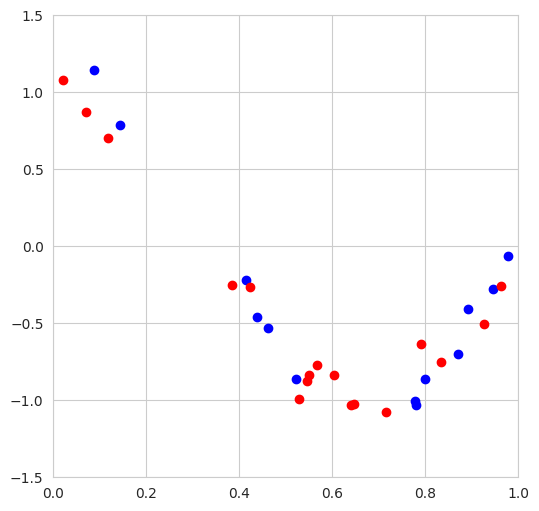

In [17]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]


# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics
from sklearn import linear_model

In [19]:
X1=np.vstack(X1)
X2=np.vstack(X2)
model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model1.fit(X1, y1)
model2 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model2.fit(X2, y2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

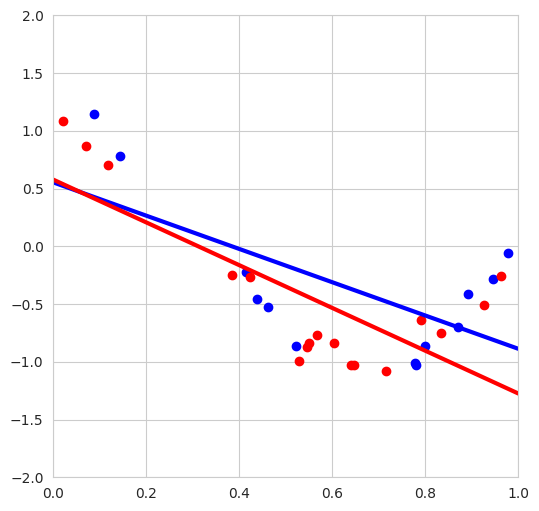

In [20]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-2,2])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)
plt.show()


In [21]:
X1=np.vstack(X1)
X2=np.vstack(X2)
model1 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model1.fit(X1, y1)
model2 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model2.fit(X2, y2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

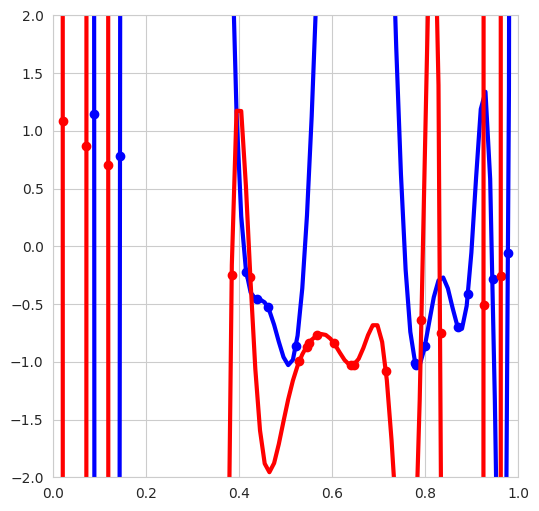

In [22]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-2,2])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model2.predict(x_plot), color='red',linewidth=3)
plt.show()


# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


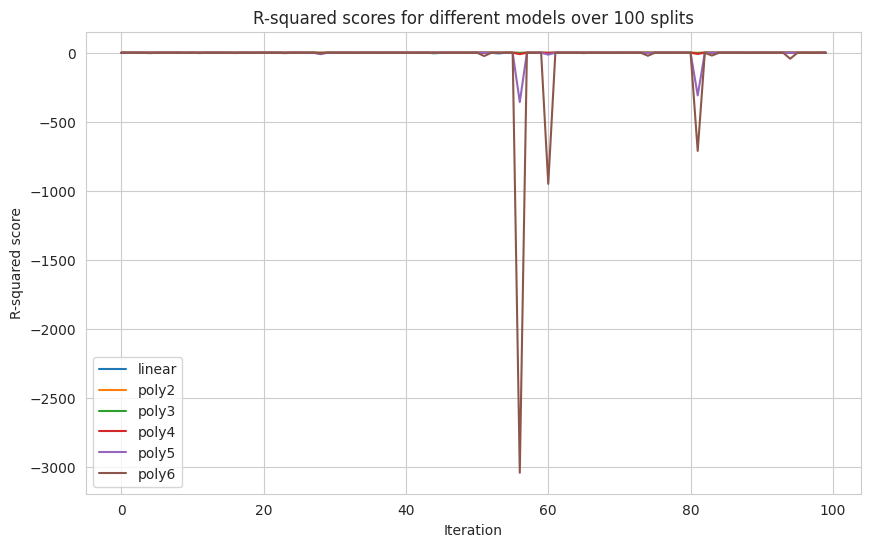

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

r2_scores = {'linear': [], 'poly2': [], 'poly3': [], 'poly4': [], 'poly5': [], 'poly6': []}

for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    model_linear = linear_model.LinearRegression()
    model_linear.fit(X_train, y_train)

    r2_scores['linear'].append(r2_score(y_test, model_linear.predict(X_test)))

    for degree in range(2, 7):
        model_poly = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
        model_poly.fit(X_train, y_train)
        r2_scores[f'poly{degree}'].append(r2_score(y_test, model_poly.predict(X_test)))

plt.figure(figsize=(10, 6))
for model, scores in r2_scores.items():
    plt.plot(scores, label=model)

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('R-squared score')
plt.title('R-squared scores for different models over 100 splits')
plt.show()

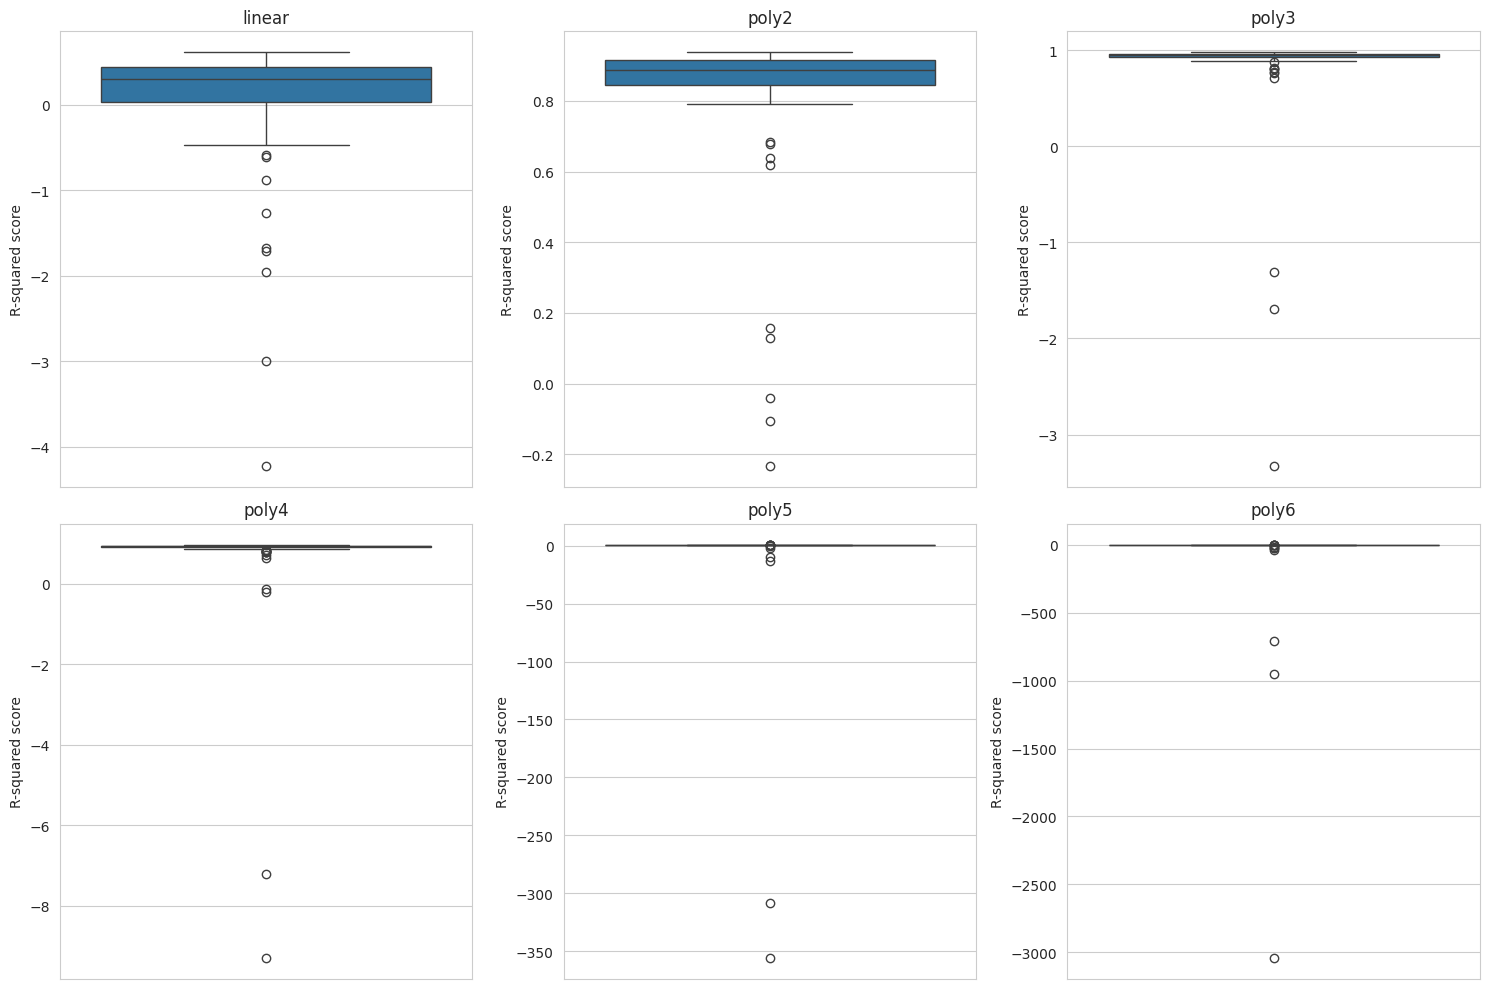

In [24]:
r2_scores_df = pd.DataFrame(r2_scores)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

models = ['linear', 'poly2', 'poly3', 'poly4', 'poly5', 'poly6']
for ax, model in zip(axs.flatten(), models):
    #ax.set_ylim([-3,1])
    sns.boxplot(y=r2_scores_df[model], ax=ax)
    ax.set_title(model)
    ax.set_ylabel('R-squared score')

plt.tight_layout()
plt.show()